1.Import Libraries and Define Helper Functions

In [ ]:
!sudo apt-get update -y && \
sudo apt-get install -y python3.12 python3.12-distutils && \
sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 1 && \
sudo update-alternatives --config python3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,613 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,466 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages 

In [ ]:
!python3 -m ensurepip --upgrade
!apt-get install python3-pip
!which pip
!pip --version
!python -m pip --version

/usr/bin/python3: No module named ensurepip
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
/usr/local/bin/pip
pip 22.0.2 from /usr/lib/python3/dist-packages/pip (python 3.12)
pip 22.0.2 from /usr/lib/python3/dist-packages/pip (python 3.12)


In [ ]:
!python --version
!pip install tensorflow==2.17.0
!pip install matplotlib==3.9.2
!pip install numpy==1.26.4
!pip install keras==3..0
!pip install joblib==1.4.2
!pip install opencv-contrib-python==4.10.0.84

Python 3.12.7
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/base_command.py", line 165, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/req_command.py", line 205, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/pip/_internal/commands/install.py", line 285, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/req_command.py", line 75, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/req_command.py", line 89, in _build_session
    session = PipSession(
              ^^^^^^^^^^^
  File "/usr/l

In [ ]:
import pkg_resources

required_packages = ['tensorflow', 'matplotlib', 'numpy', 'keras', 'joblib', 'opencv-contrib-python']
installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

print("Installed Packages:")
for package in required_packages:
    if package in installed_packages:
        print(f"- {package}: Installed (Version: {installed_packages[package]})")
    else:
        print(f"- {package}: Not Installed")

Installed Packages:
- tensorflow: Installed (Version: 2.17.0)
- matplotlib: Installed (Version: 3.8.0)
- numpy: Installed (Version: 1.26.4)
- keras: Installed (Version: 3.4.1)
- joblib: Installed (Version: 1.4.2)
- opencv-contrib-python: Installed (Version: 4.10.0.84)


In [ ]:
# Import necessary libraries for image processing, data parsing, and model training
import xml.etree.ElementTree as ET  # For parsing XML files
import cv2  # OpenCV for image processing
import numpy as np  # For numerical operations on arrays
import matplotlib.pyplot as plt  # For plotting images and graphs
from tensorflow.keras.applications import MobileNetV2  # Pre-trained MobileNetV2 model for transfer learning
from tensorflow.keras.models import Model  # For building and training the neural network model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D  # Layers for customizing the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation # Changed import to use tf.keras
from tensorflow.keras.optimizers import Adam  # Optimizer for model training
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For creating confusion matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # Changed import to use tf.keras
import os
import random
import joblib
import xml.etree.ElementTree as ET


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.LOAD IMAGE AND PRASE XML DATA

In [ ]:
import os
import cv2
import json
import numpy as np

# Path to the processed data directory
processed_data_dir = '/content/drive/MyDrive/processed_data'

# Define the input size for the images (e.g., 224x224 for MobileNetV2)
input_size = (640,640)

# Prepare an empty list to hold the processed data
all_data = []

# Loop through each label folder and load the data
for label_folder in os.listdir(processed_data_dir):
    folder_path = os.path.join(processed_data_dir, label_folder)

    # Only process if it's a directory (for labels)
    if os.path.isdir(folder_path):
        print(f"Processing label: {label_folder}")

        for json_file in os.listdir(folder_path):
            if json_file.endswith('.json'):
                # Load the corresponding JSON file
                json_path = os.path.join(folder_path, json_file)
                with open(json_path, 'r') as file:
                    annotation_data = json.load(file)

                # Load the corresponding image file
                image_path = os.path.join(folder_path, json_file.replace('.json', '.png'))
                image = cv2.imread(image_path)
                image = cv2.resize(image, input_size)  # Resize the image to the required input size
                image = image / 255.0  # Normalize the image to [0, 1]

                # Extract data from JSON
                label = annotation_data['label']
                bbox = annotation_data['bbox']
                keypoints_left = annotation_data['keypoints_left']
                keypoints_right = annotation_data['keypoints_right']

                # Append the data to the all_data list in the same structure as your original all_data
                all_data.append((image, label, bbox, keypoints_left, keypoints_right))

# Print confirmation of the total number of items in all_data
print(f"Total data entries created: {len(all_data)}")


Processing label: 0
Processing label: 9
Processing label: 6
Processing label: 4
Processing label: 2


3.Overlay Annotations (Bounding Box, Label, and Keypoints)

Sample Image: [[[135 120 200]
  [137 121 202]
  [138 120 204]
  ...
  [192 194 182]
  [191 196 184]
  [192 199 185]]

 [[135 120 200]
  [136 120 202]
  [137 119 203]
  ...
  [190 193 182]
  [189 194 182]
  [190 196 183]]

 [[135 119 200]
  [136 119 201]
  [135 117 201]
  ...
  [187 192 181]
  [188 193 181]
  [189 194 182]]

 ...

 [[151 164 161]
  [153 165 162]
  [152 164 162]
  ...
  [ 70  98 104]
  [ 70  97 104]
  [ 70  97 103]]

 [[154 164 161]
  [156 165 162]
  [155 164 162]
  ...
  [ 70  97 104]
  [ 70  97 104]
  [ 71  96 104]]

 [[157 165 161]
  [158 165 162]
  [157 164 163]
  ...
  [ 71  97 105]
  [ 71  97 105]
  [ 71  95 104]]]
Sample Label: 4
Sample Bounding Box: {'left': {'xmin': 0, 'ymin': 0, 'xmax': 0, 'ymax': 0}, 'right': {'xmin': 64, 'ymin': 156, 'xmax': 254, 'ymax': 572}}
Sample Left Hand Keypoints: [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0,

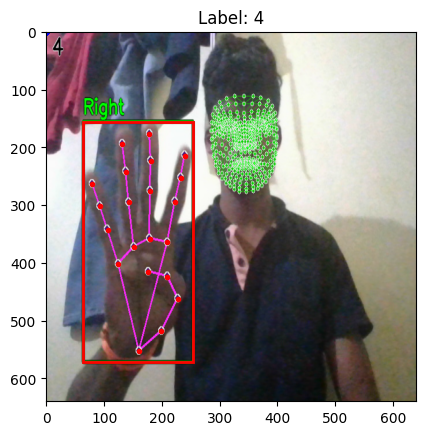

In [ ]:
# ( PRIMARY )

import matplotlib.pyplot as plt
import random
import cv2

# Select a random sample from the parsed data
sample_image, sample_label, sample_bbox, sample_keypoints_left, sample_keypoints_right = random.choice(all_data)

# If the image is of type float64, convert it to uint8((FOR JSON ))
if sample_image.dtype == np.float64:
    print(sample_image.dtype)
    sample_image = (sample_image * 255).astype(np.uint8)

# Display the randomly selected sample with annotations
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title(f"Label: {sample_label}")

# Draw left and right hand bounding boxes if present
xmin, ymin, xmax, ymax = sample_bbox['left']['xmin'], sample_bbox['left']['ymin'], sample_bbox['left']['xmax'], sample_bbox['left']['ymax']
plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='blue', facecolor='none'))
xmin, ymin, xmax, ymax = sample_bbox['right']['xmin'], sample_bbox['right']['ymin'], sample_bbox['right']['xmax'], sample_bbox['right']['ymax']
plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none'))

# Plot left hand keypoints if they exist
for (x, y) in sample_keypoints_left:
    plt.plot(x * sample_image.shape[1], y * sample_image.shape[0], 'bo',markersize=2)  # Blue dots for left hand keypoints

# Plot right hand keypoints if they exist
for (x, y) in sample_keypoints_right:
    plt.plot(x * sample_image.shape[1], y * sample_image.shape[0], 'ro',markersize=2)  # Red dots for right hand keypoints


plt.show()




4.Prepare Dataset and Data Generators

Pixel values before normalization (min, max): 0 255
Pixel values after normalization (min, max): 0.0 1.0


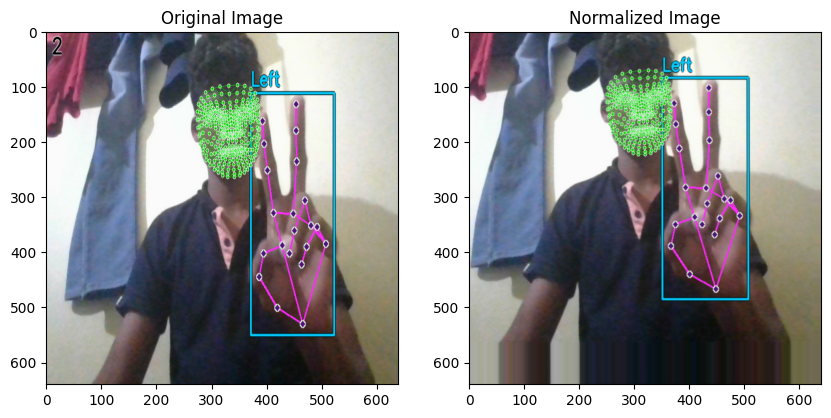

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import random

# Initialize ImageDataGenerator with only rescaling (normalization)
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    #rotation_range=5,  # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of height
    shear_range=0.1,  # Shear transformation
    zoom_range=0.1,  # Random zoom
    horizontal_flip=False,  # Randomly flip images horizontally
    fill_mode='nearest'
)

# Load a sample image
sample_image = random.choice(all_data)[0]

# Reshape the image to add an extra dimension
sample_image = np.expand_dims(sample_image, axis=0)

# Print pixel values before normalization
print("Pixel values before normalization (min, max):", sample_image.min(), sample_image.max())

# Generate a batch of normalized images
normalized_images = datagen.flow(sample_image, batch_size=1)

# Get the normalized image from the generator
normalized_image = next(normalized_images)[0]

# Print pixel values after normalization
print("Pixel values after normalization (min, max):", normalized_image.min(), normalized_image.max())

# Display the original and normalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sample_image[0], cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))
plt.title('Normalized Image')

plt.show()

5. prepare data for training

In [ ]:
# Assuming all_data is already populated with (image, label, bbox, keypoints_left, keypoints_right, keypoints_face)
X = []
y = []
for image, label, bbox, keypoints_left, keypoints_right in all_data:
    X.append(image)
    y.append(label_mapping[label])

X = np.array(X)
y = np.array(y)

# One-hot encode the labels
#y = to_categorical(y, num_classes=len(label_mapping))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert your labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)


6.Define and Compile the Model

In [ ]:
# Load the base MobileNetV2 model without the top classification layer
base_model = MobileNetV2(input_shape=(640, 640, 3), include_top=False, weights='imagenet')

# Fine-tuning: Unfreeze some layers in the base model for better feature extraction
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Increased units for more complex patterns
x = Dropout(0.6)(x)  # Increased dropout for stronger regularization
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)

# Final output layer
output = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a lower learning rate and a different optimizer (optional)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to verify the architecture
#model.summary()

# Make sure your data is properly shaped
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)



<ipython-input-7-47567d2818fb>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(640, 640, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (1861, 640, 640, 3)
y_train shape: (1861, 10)
X_val shape: (466, 640, 640, 3)
y_val shape: (466, 10)


6.Train the Model

In [ ]:
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define the ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Filepath to save the best model
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Only save the model if the validation loss improves
    mode='min'  # Minimize validation loss
)

# Train the model using the data generator and the callbacks
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],  # Include both callbacks
    verbose=1
)


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")

# Save model
model.save("hand_gesture_model.h5")




7.Plot Accuracy, Loss, and Confusion Matrix

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")
model.save("hand_gesture_model.h5")


# Plot training accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Generate confusion matrix for the validation set
y_pred = model.predict(X_val)  # Replace with actual validation data
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)  # Replace with actual validation labels

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#!pip install mediapipe
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import mediapipe as mp
import numpy as np
import os
import xml.etree.ElementTree as ET
import time
from tensorflow.keras.models import load_model
import pickle

# Initialize Mediapipe modules for hand and face detection
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Constants
IMG_SIZE = (640, 640)
MARGIN = 15
MODEL_PATH = '/content/hand_gesture_model.h5'  # Replace with the path to your .h5 model
LABEL_MAP_PATH = '/content/label_mapping.pkl'  # Replace with the path to your label map file

# Load the trained model and label map
model = load_model(MODEL_PATH)
with open(LABEL_MAP_PATH, 'rb') as f:
    label_map = pickle.load(f)

# Function to preprocess each frame for prediction (resize to model input size)
def preprocess_frame(frame):
    frame_resized = cv2.resize(frame, IMG_SIZE)
    frame_normalized = frame_resized / 255.0  # Normalize pixel values
    frame_expanded = np.expand_dims(frame_normalized, axis=0)  # Add batch dimension
    return frame_expanded

# Function to predict hand gesture using the model
def predict_gesture(frame):
    processed_frame = preprocess_frame(frame)
    predictions = model.predict(processed_frame)
    predicted_class = np.argmax(predictions, axis=1)[0]
    gesture_label = label_map[predicted_class]
    confidence = predictions[0][predicted_class]
    return gesture_label, confidence

# Start capturing from webcam
cap = cv2.VideoCapture(0)
with mp_hands.Hands(max_num_hands=2) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to RGB for Mediapipe processing
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        hand_results = hands.process(frame_rgb)

        # Draw hand landmarks
        if hand_results.multi_hand_landmarks:
            for hand_landmarks in hand_results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Make a prediction if a hand is detected
        if hand_results.multi_hand_landmarks:
            # Predict gesture
            gesture_label, confidence = predict_gesture(frame)

            # Display predicted label and confidence on the frame
            label_text = f"Gesture: {gesture_label} ({confidence:.2f})"
            cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, lineType=cv2.LINE_AA)

        # Display the frame
        cv2.imshow('Hand Gesture Recognition', frame)
        if not ret:
          print("Ignoring empty camera frame.")
          break
        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
